# Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Iteration and Combinatorics
import itertools

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Feature selection
from sklearn.feature_selection import RFE

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)


Import Data Set Using Pandas

In [2]:
# Load the training data from Train_data.csv file
train_df = pd.read_csv("NIDS - Dataset/Train_data.csv")

# Load the testing data from Test_data.csv file
test_df = pd.read_csv("NIDS - Dataset/Test_data.csv")

# Data Preprocessing

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [7]:
# Check for missing values in train_df
print("Number Of Missing Values      ⬇️\n", train_df.isnull().sum())

Number Of Missing Values      ⬇️
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_

In [8]:
print("Number Of Duplicated Values : ", train_df.duplicated().sum())

Number Of Duplicated Values :  0


C:\Users\abdul\AppData\Local\Temp\ipykernel_16376\1539091368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


<Axes: >

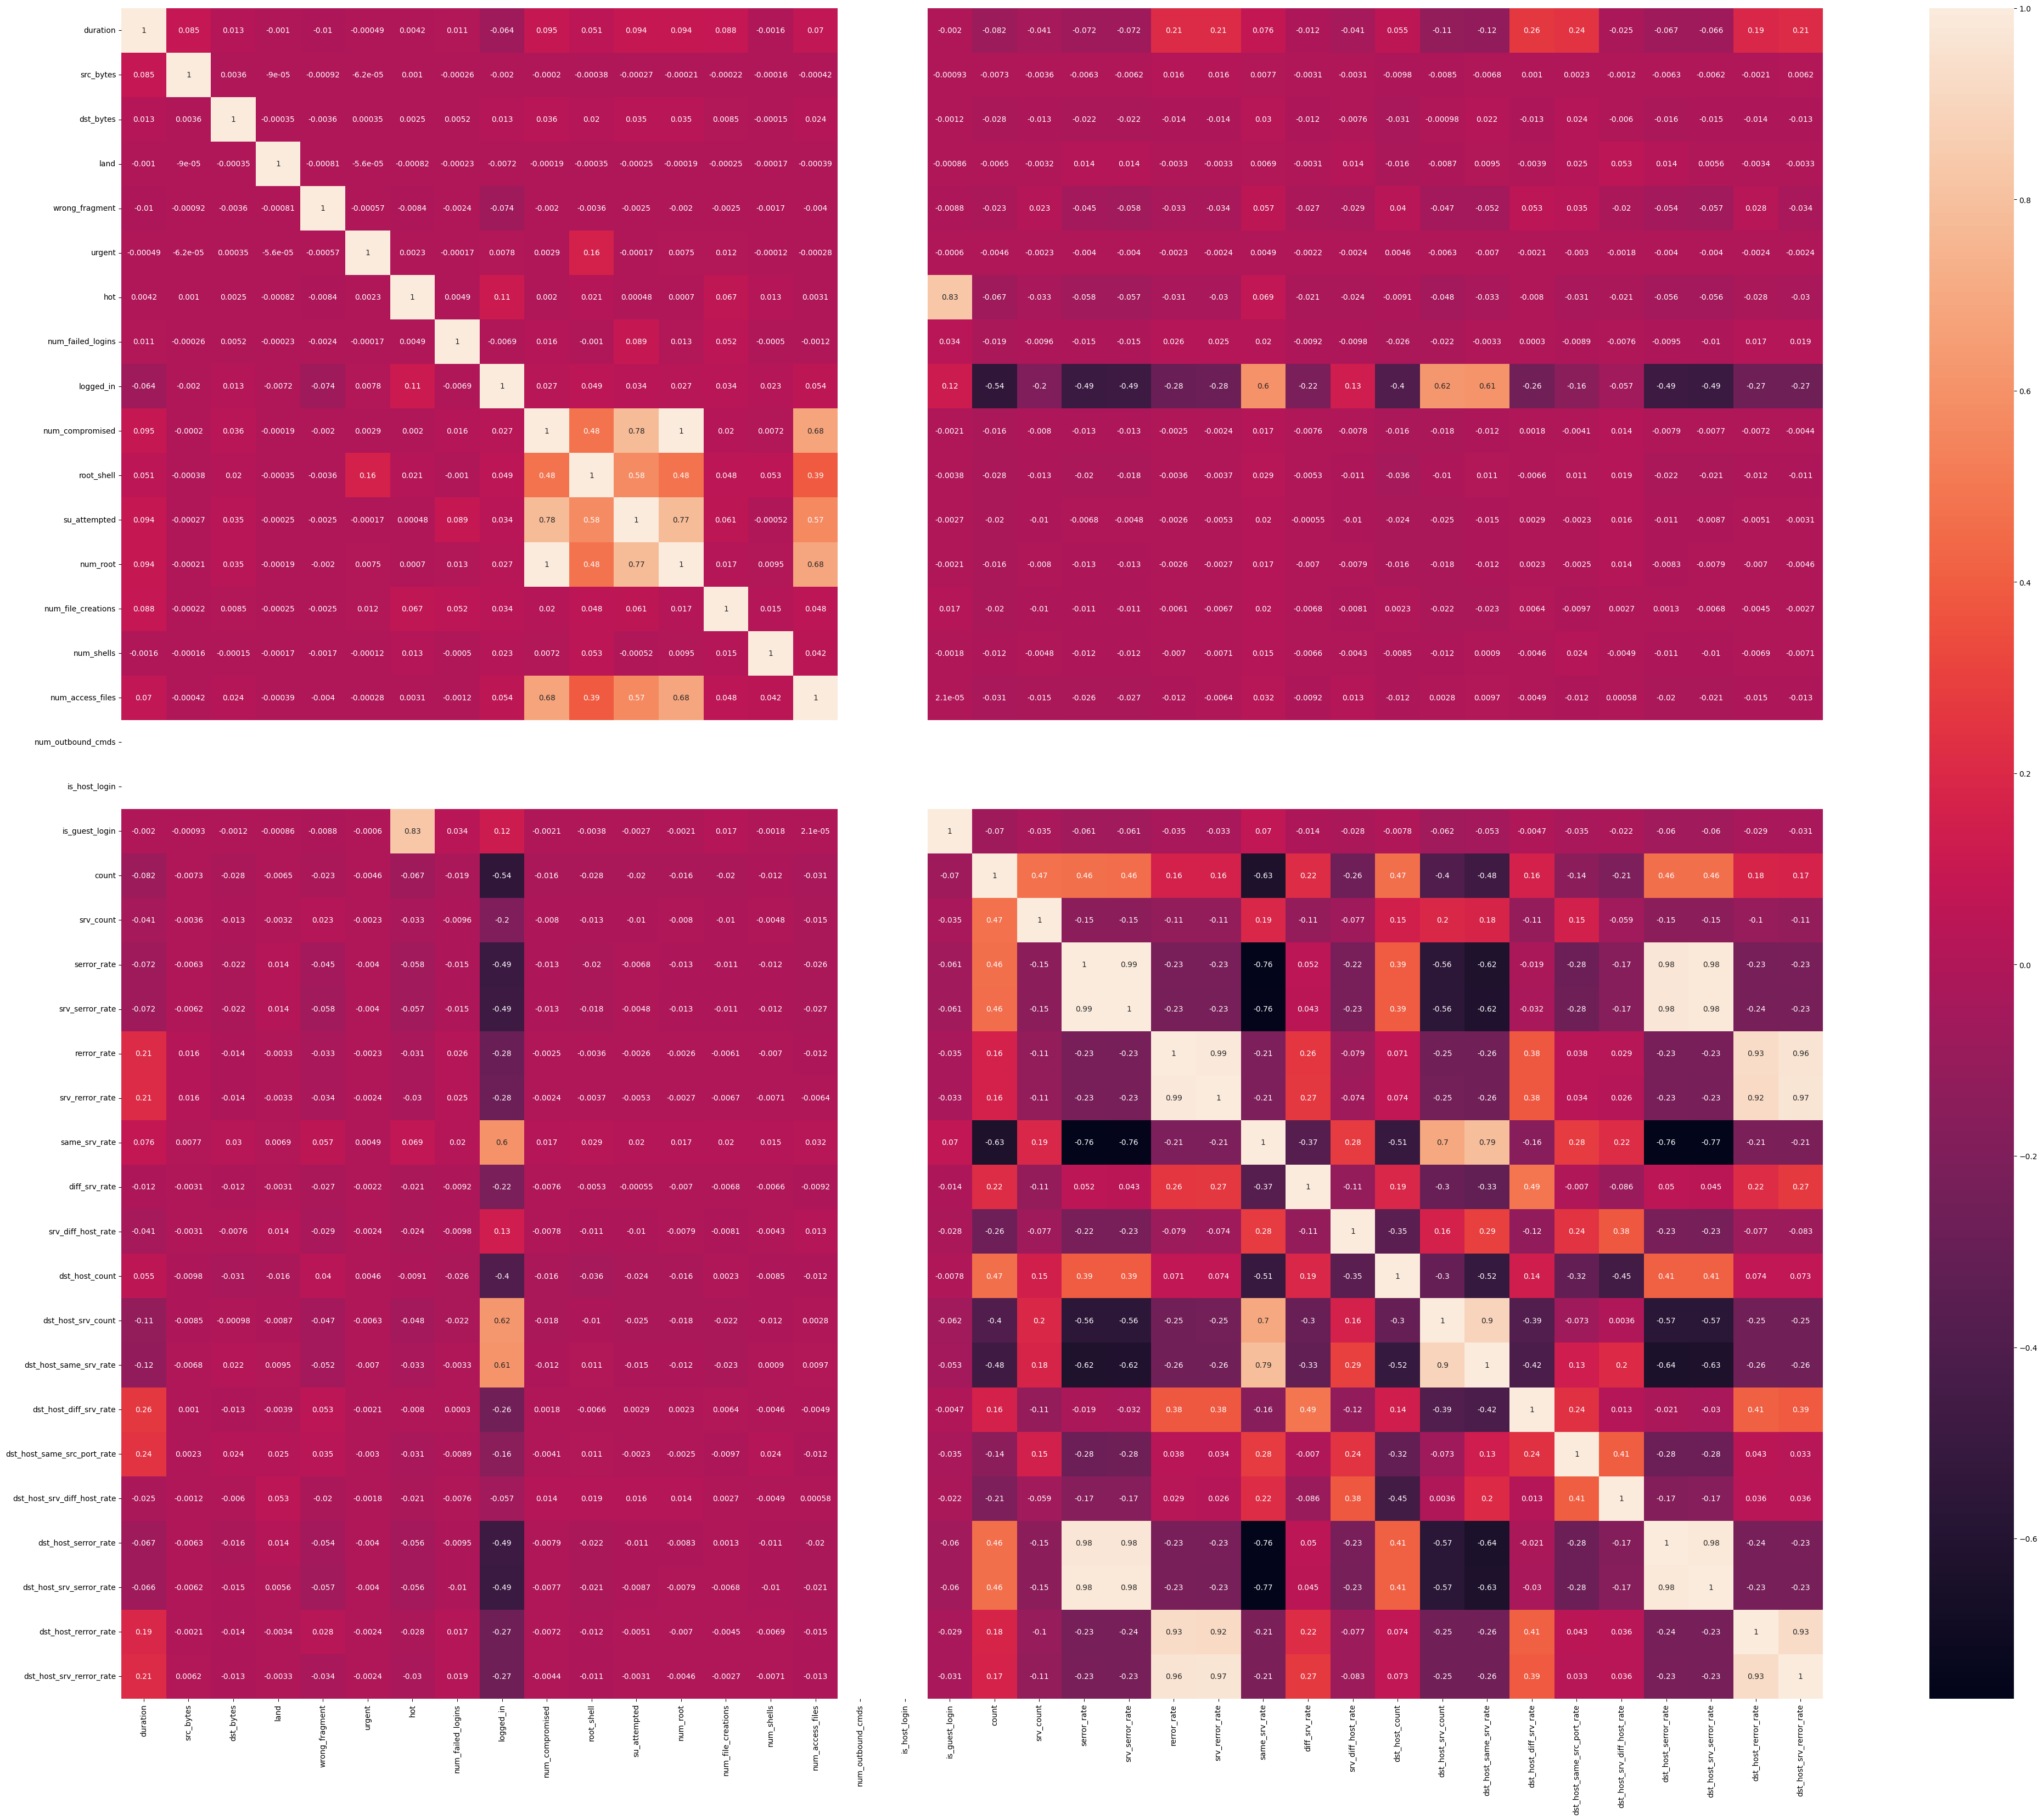

In [9]:
plt.figure(figsize=(50,40))
sns.heatmap(train_df.corr(), annot=True)

<Axes: xlabel='class', ylabel='count'>

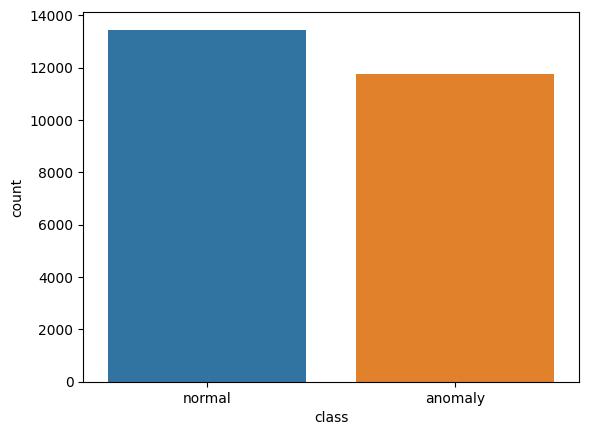

In [10]:
sns.countplot(x=train_df['class'])

In [11]:
# Define a function to apply label encoding to categorical columns
def label_encode(df):
    # Loop over columns in the dataframe
    for col in df.columns:
        # Check if the column contains object datatype (i.e., categorical)
        if df[col].dtype == 'object':
            # Create a label encoder object
            label_encoder = LabelEncoder()
            # Fit the encoder to the column and transform the column
            df[col] = label_encoder.fit_transform(df[col])

# Apply label encoding to both training and testing dataframes
label_encode(train_df)
label_encode(test_df)

In [12]:
# Print the preprocessed training data
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


# Feature selection

In [13]:
#Splitting the data into features and target
X_train = train_df.drop(['class'], axis=1)
Y_train = train_df['class']

In [14]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test_df)

In [15]:
# Split the preprocessed data into training, validation, and testing sets
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, train_size=0.50, random_state=2)

# Light Gradient Boosting Model

In [16]:
# Light Gradient Boosting Model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [17]:
# Evaluate the model and store the results in dictionaries
train_results = {'accuracy': None, 'precision': None, 'recall': None, 'f1': None}
val_results = {'accuracy': None, 'precision': None, 'recall': None, 'f1': None}
test_results = {'accuracy': None, 'precision': None, 'recall': None, 'f1': None}

for dataset, results in [('train', train_results), ('validation', val_results), ('test', test_results)]:
    # Evaluate the model on the dataset
    if dataset == 'train':
        y_pred = lgb_model.predict(x_train)
    elif dataset == 'validation':
        y_pred = lgb_model.predict(x_val)
    else:
        y_pred = lgb_model.predict(x_test)
    
    # Calculate the evaluation metrics
    results['accuracy'] = accuracy_score(y_train if dataset == 'train' else (y_val if dataset == 'validation' else y_test), y_pred)
    results['precision'] = precision_score(y_train if dataset == 'train' else (y_val if dataset == 'validation' else y_test), y_pred, average='macro')
    results['recall'] = recall_score(y_train if dataset == 'train' else (y_val if dataset == 'validation' else y_test), y_pred, average='macro')
    results['f1'] = f1_score(y_train if dataset == 'train' else (y_val if dataset == 'validation' else y_test), y_pred, average='macro')

# Print the evaluation metrics for training, validation, and testing sets
for dataset, results in [('Training', train_results), ('Validation', val_results), ('Testing', test_results)]:
    print(f"\nEvaluation metrics on the {dataset} set:")
    print(f"Accuracy: {results['accuracy']:.3f}")
    print(f"Precision: {results['precision']:.3f}")
    print(f"Recall: {results['recall']:.3f}")
    print(f"F1-score: {results['f1']:.3f}")



Evaluation metrics on the Training set:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000

Evaluation metrics on the Validation set:
Accuracy: 0.998
Precision: 0.998
Recall: 0.998
F1-score: 0.998

Evaluation metrics on the Testing set:
Accuracy: 0.998
Precision: 0.998
Recall: 0.998
F1-score: 0.998


<Axes: >

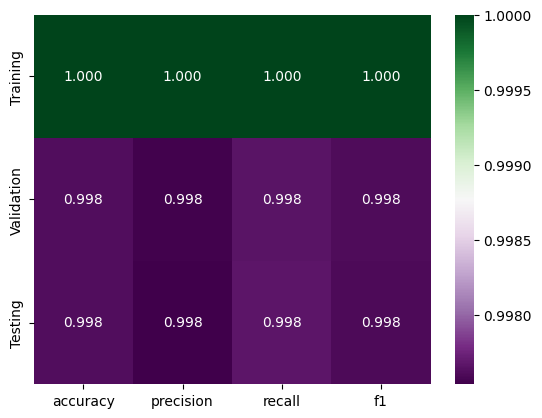

In [18]:
# Create a pandas DataFrame from the evaluation results dictionaries
results_df = pd.DataFrame({'Training': train_results, 'Validation': val_results, 'Testing': test_results})

# Transpose the DataFrame so that the evaluation metrics are rows and the datasets are columns
results_df = results_df.T

# Plot the heatmap
sns.heatmap(results_df, annot=True, cmap='PRGn', fmt='.3f')